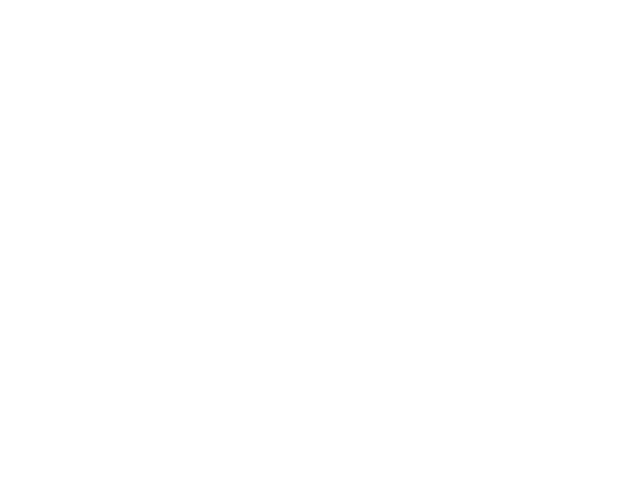

In [2]:
%matplotlib ipympl
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from astropy.io import ascii
import glob 
def comma_to_period(x):
    return x.replace(',', '.')

# ascii.read("/Users/Vincent/oceanview/USB2F014341__0__11-22-05-744.txt",data_start=13, guess=False, delimiter=' ')

import pandas as pd


files = glob.glob("/Users/Vincent/oceanview/USB2F014341__*.txt")
# df=pd.read_csv("/Users/Vincent/oceanview/USB2F014341__0__11-22-05-744.txt",  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")
# df2=pd.read_csv("/Users/Vincent/oceanview/USB2F014341__1__11-22-05-864.txt",  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")

plt.figure()
for f in files:
    df=pd.read_csv(f,  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")
    plt.plot(df[0],df[1])
# plt.yscale("log")
plt.show()




In [5]:
import os
files = glob.glob("/Users/Vincent/oceanview/outer_part/*.txt")
files.sort(key=os.path.getmtime)


dft = pd.read_csv(files[-1],  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",").T[2:]
number = len(dft.columns)-1
dft['median'] = dft.iloc[:, 1:].median(axis=1)

fig, (ax0,ax1) = plt.subplots(2, 1,sharex=True,figsize=(12,8))
ax0.plot(dft[0],dft['median'],"k-",label="Median")
ax1.axhline(1,c="k",ls="-")
ax1.axvline(205,c="b",ls="-",alpha=0.1,lw=20)
ax0.axvline(205,c="b",ls="-",alpha=0.1,lw=20)
for i in np.arange(1,number):
    ax0.plot(dft[0],dft[i],label=i,alpha=0.1,c="grey")
    ax1.plot(dft[0],dft['median']/dft[i],alpha=0.1,c="grey")
ax0.legend()
ax1.set_ylim((0.9,1.1))
# ax0.set_xscale("log")
# plt.yscale("log")
ax1.set_xlabel("Wavelength (nm)")
ax0.set_ylabel("Measured Flux")
ax1.set_ylabel("Ratio to median")

fig.tight_layout()
plt.show()



KeyError: 'median'

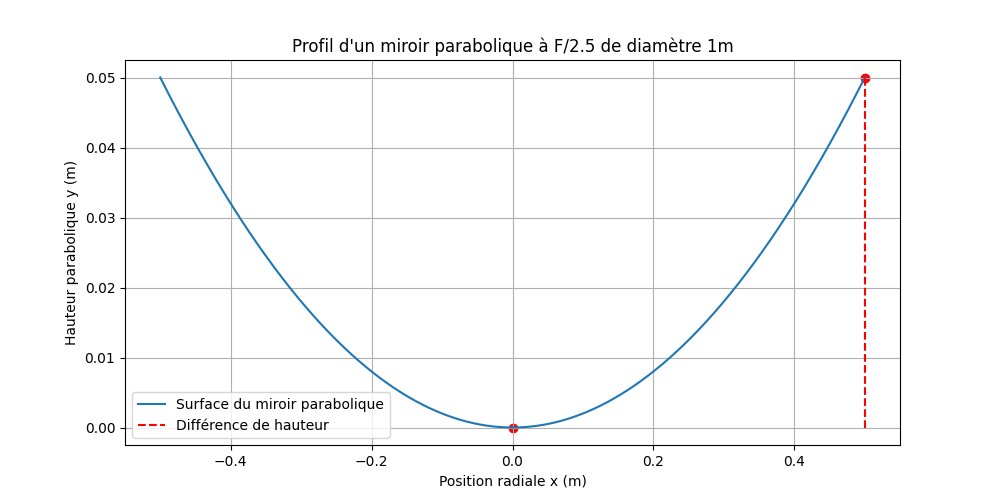

La différence de hauteur entre le centre et le bord du miroir est de 0.0500 mètres.


In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Spécifications du miroir
D = 1.0  # diamètre en mètres
F_number = 2.5  # rapport d'ouverture F/

# Calcul de la distance focale f
f = (F_number * D) / 2

# Équation de la parabole y = (1/(4f)) * x^2
# Génération des valeurs de x entre -D/2 et D/2
x = np.linspace(-D/2, D/2, 1000)
y = (1/(4*f)) * x**2

# Trouver la valeur de y pour x = D/2 (le bord du miroir)
y_edge = (1/(4*f)) * (D/2)**2

# Tracer la parabole
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Surface du miroir parabolique')

# Marquer la différence de hauteur entre le centre et le bord
plt.scatter([0, D/2], [0, y_edge], color='red') # Points au centre et au bord
plt.plot([D/2, D/2], [0, y_edge], color='red', linestyle='--', label='Différence de hauteur')

# Annotations et légendes
plt.title("Profil d'un miroir parabolique à F/2.5 de diamètre 1m")
plt.xlabel('Position radiale x (m)')
plt.ylabel('Hauteur parabolique y (m)')
plt.legend()
plt.grid(True)
plt.show()

# Afficher la différence de hauteur
print(f"La différence de hauteur entre le centre et le bord du miroir est de {y_edge:.4f} mètres.")

In [36]:
import os
files = glob.glob("/Users/Vincent/oceanview/outer_part/p*.txt")
files.sort(key=os.path.getmtime)


dft = pd.read_csv("/Users/Vincent/oceanview/outer_part/reference.txt",  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")#.T[2:]
dft = pd.read_csv("/Users/Vincent/oceanview/outer_part/2009  circle standard.txt",  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")#.T[2:]
number = len(dft.columns)-1
# dft['median'] = dft.iloc[:, 1:].median(axis=1)

fig, (ax0,ax1) = plt.subplots(2, 1,sharex=True,figsize=(12,8))
ax0.plot(dft[0],dft[1],alpha=1,c="k",label="reference")
# ax0.plot(dft[0],dft['median'],"k-",label="Median")
ax1.axhline(1,c="k",ls="-")
ax1.axvline(205,c="b",ls="-",alpha=0.1,lw=20)
ax0.axvline(205,c="b",ls="-",alpha=0.1,lw=20)
for f in files:
    edge = pd.read_csv(f,  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")#.T[2:]
    ax0.plot(edge[0],edge[1],alpha=0.1,c="k",label=os.path.basename(f))
    ax1.plot(dft[0],edge[1]/dft[1],alpha=0.1,c="grey")
ax0.legend()
ax1.set_ylim((0.7,1.2))
# ax0.set_xscale("log")
# plt.yscale("log")
ax1.set_xlabel("Wavelength (nm)")
ax0.set_ylabel("Measured Flux")
ax1.set_ylabel("Ratio to median")

fig.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/Users/Vincent/oceanview/outer_part/reference.txt'

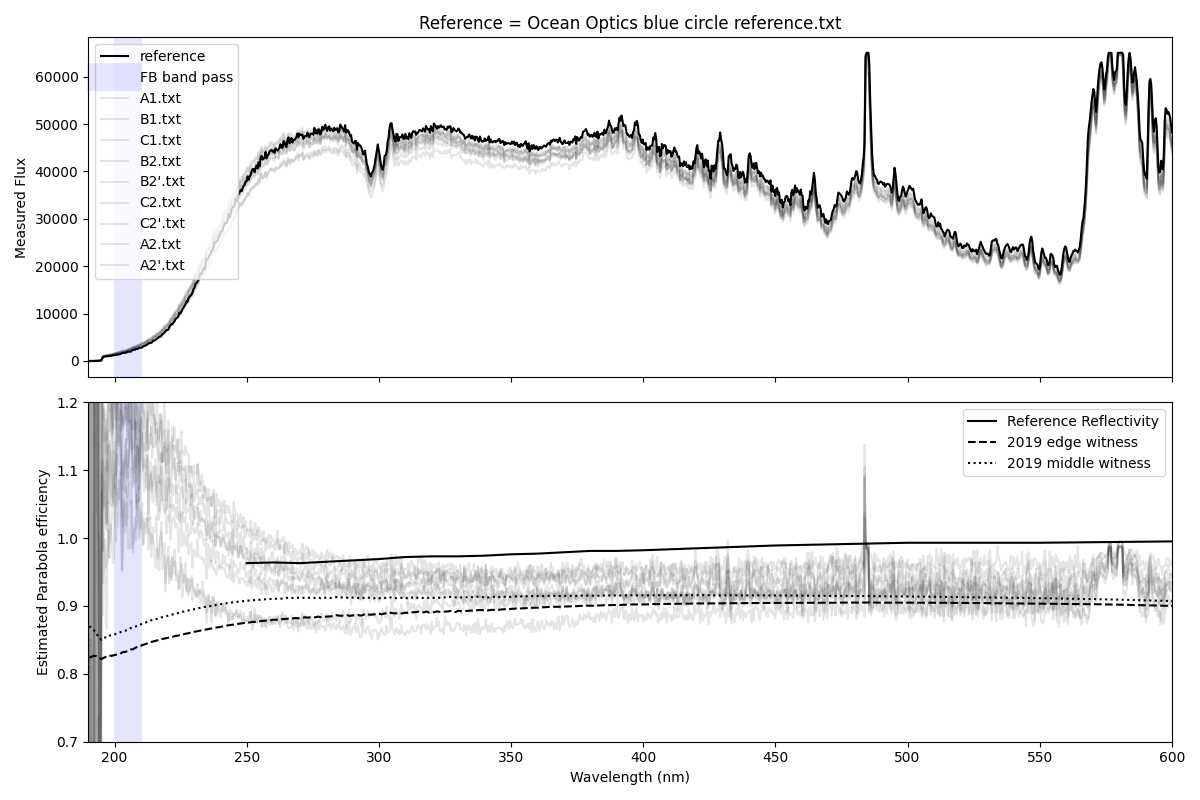

In [115]:
import os
from scipy.interpolate import interp1d

files = glob.glob("/Users/Vincent/oceanview/outer_part/[ABC]*.txt")
files.sort(key=os.path.getmtime)

ref="/Users/Vincent/oceanview/outer_part/broken_piece_not_recoated.txt"
ref="/Users/Vincent/oceanview/outer_part/2009  circle standard.txt"
ref="/Users/Vincent/oceanview/outer_part/Ocean Optics blue circle reference.txt"
# ref="/Users/Vincent/oceanview/USB2F014341__6__12-37-27-920.txt"
# ref="/Users/Vincent/oceanview/outer_part/2009 UV coated reference - witness sample.txt"

reference_reflectivity = pd.read_csv("/Users/Vincent/oceanview/outer_part/WS_1.Standard",  delimiter= "\t", skiprows=range(0, 7), header=None, decimal=",")

ref_2019 = Table.read("/Users/Vincent/oceanview/outer_part/2019_10_25_AM219_Fireball_witness results.csv")

# dft = pd.read_csv("/Users/Vincent/oceanview/outer_part/reference.txt",  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")#.T[2:]
dft = pd.read_csv(ref,  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")#.T[2:]
number = len(dft.columns)-1
# dft['median'] = dft.iloc[:, 1:].median(axis=1)

fig, (ax0,ax1) = plt.subplots(2, 1,sharex=True,figsize=(12,8))
ax0.plot(dft[0],dft[1],alpha=1,c="k",label="reference")
# ax0.plot(dft[0],dft['median'],"k-",label="Median")
ax1.axvline(205,c="b",ls="-",alpha=0.1,lw=20)
ax0.axvline(205,c="b",ls="-",alpha=0.1,lw=20,label="FB band pass")

reflec =  interp1d(reference_reflectivity[0],np.array(reference_reflectivity[1],dtype=float),  bounds_error=False,fill_value="extrapolate")


for f in files:
    edge = pd.read_csv(f,  delimiter= "\t", skiprows=range(0, 14), header=None, decimal=",")#.T[2:]
    ax0.plot(edge[0],edge[1],alpha=0.1,c="k",label=os.path.basename(f))
    if ref=="/Users/Vincent/oceanview/outer_part/Ocean Optics blue circle reference.txt":
        ax1.plot(dft[0],reflec(dft[0])*edge[1]/dft[1],alpha=0.1,c="k")
    else:
        ax1.plot(dft[0],edge[1]/dft[1],alpha=0.1,c="grey")


if ref!="/Users/Vincent/oceanview/outer_part/Ocean Optics blue circle reference.txt":
        ax1.axhline(1,c="k",ls="-",label="Assumed reference reflecitivty")


ax1.plot(list(reference_reflectivity[0]),np.array(reference_reflectivity[1],dtype=float),alpha=1,c="k",label="Reference Reflectivity")


ax1.plot(ref_2019["AM21903B_edge witness"],ref_2019["_2"]/100,"--k",label="2019 edge witness")
ax1.plot(ref_2019["AM21903B_edge witness"],ref_2019["col1"]/100,":k",label="2019 middle witness")


ax0.legend()
ax1.legend()
ax1.set_xlim((190,600))
ax1.set_ylim((0.7,1.2))
ax0.set_title("Reference = %s"%(os.path.basename(ref)))
# ax0.set_xscale("log")
# plt.yscale("log")
ax1.set_xlabel("Wavelength (nm)")
ax0.set_ylabel("Measured Flux")
ax1.set_ylabel("Estimated Parabola efficiency")

fig.tight_layout()
plt.show()



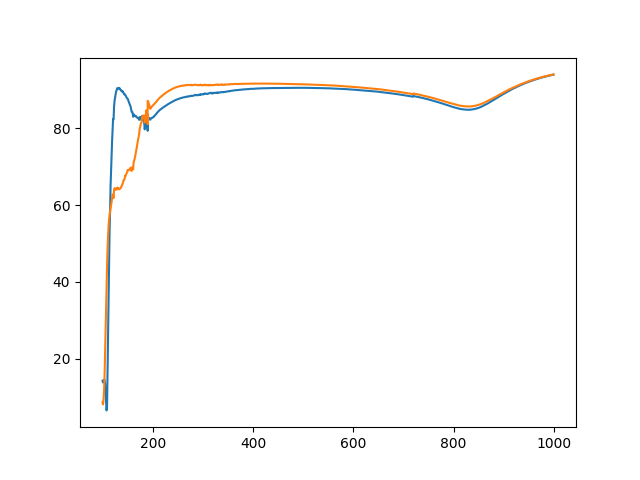

In [111]:
ref_2019
plt.figure()

plt.show()

In [80]:
Table.read("/Users/Vincent/oceanview/outer_part/WS_1.Standard",  format="ascii", skiprows=range(0, 7), header=None, decimal=",")


InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:FixedWidthTwoLine decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:RST decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:FastRdb decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Rdb decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:FastTab decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Tab decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Cds decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Mrt decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Daophot decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:SExtractor decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Ipac decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:Latex decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:AASTex decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastCommentedHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:CommentedHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastBasic decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:FastNoHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: '"' skiprows: range(0, 7) strict_names: True
Reader:NoHeader decimal: ',' delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] header: None quotechar: "'" skiprows: range(0, 7) strict_names: True
Reader:Basic decimal: ',' fast_reader: {'enable': True} fill_values: [('', '0')] header: None skiprows: range(0, 7)

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************

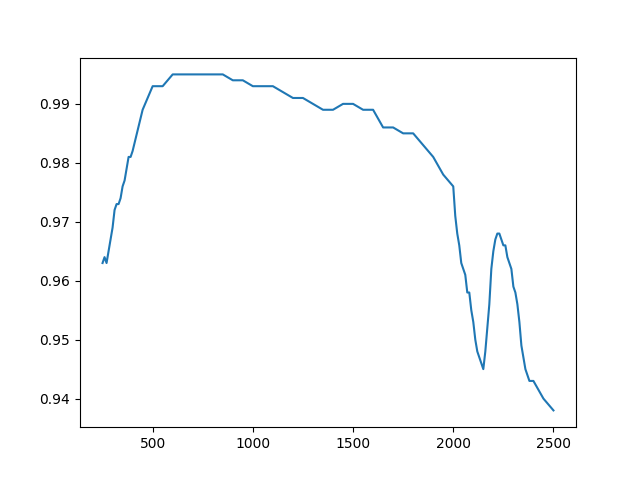

In [86]:
plt.figure()
plt.plot(list(reference_reflectivity[0]),np.array(reference_reflectivity[1],dtype=float))
plt.show()

In [85]:
reference_reflectivity[1]

0     0.963
1     0.964
2     0.963
3     0.965
4     0.967
      ...  
85    0.943
86    0.943
87    0.943
88     0.94
89    0.938
Name: 1, Length: 90, dtype: object